In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
print(tf.__version__)

2.8.2


4431872/4422102 [==============================] - 0s 0us/step


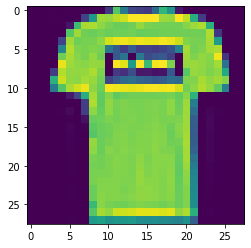

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# type(tf_data)

# print(tf_data)

# type(X_train)

# X_train.shape

# y_train.shape

# X_test.shape

# y_test.shape

f, ax = plt.subplots()
ax.imshow(X_train[1])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
    ])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 3.8208 - accuracy: 0.7001
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6710 - accuracy: 0.7595
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5753 - accuracy: 0.7966
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5333 - accuracy: 0.8134
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5195 - accuracy: 0.8221


In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)
model.predict(X_test)

313/313 - 0s - loss: 0.5688 - accuracy: 0.8102 - 366ms/epoch - 1ms/step


array([[-15.335028 ,  -7.6513214, -32.569942 , ...,  16.087358 ,
         -4.3376617,  19.822613 ],
       [ 42.957615 ,  36.64999  ,  53.585415 , ...,  -9.319776 ,
         34.184036 ,  -8.088926 ],
       [104.39518  , 130.60072  , 102.98065  , ...,  21.556448 ,
         95.69674  ,  56.105747 ],
       ...,
       [ 62.7201   ,  52.422024 , -11.569451 , ..., -24.468748 ,
         76.8429   , -37.462196 ],
       [ 81.56997  , 102.68641  ,  76.964    , ...,  -4.2487154,
         75.63327  ,  39.556625 ],
       [ -4.103608 ,   1.9150177,  -2.4329956, ...,   7.9952307,
          6.3392434,   6.862224 ]], dtype=float32)

In [ ]:
diabet = load_diabetes(as_frame=True)
X = diabet.data['bmi'].values
y = diabet.target.values
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LinearRegression().fit(X_train[:, np.newaxis], y_train)
print(lr.score(X_test[:, np.newaxis], y_test))

0.40906401666565406


In [ ]:
norm = layers.Normalization(input_shape=[1,], axis=None)
norm.adapt(X_train)
model = keras.Sequential([
      norm,
      layers.Dense(units=1)
])
# model.summary()
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mse')
hist = model.fit(X_train, y_train, epochs=100, verbose=0)

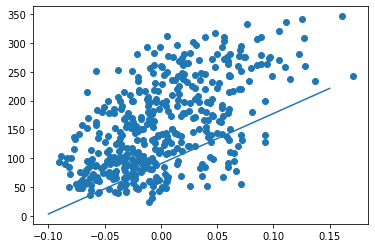

In [ ]:
f, ax = plt.subplots()
ax.scatter(X, y)
ax.plot(np.linspace(-0.1, 0.15, 20), model.predict(np.linspace(-0.1, 0.15, 20)))

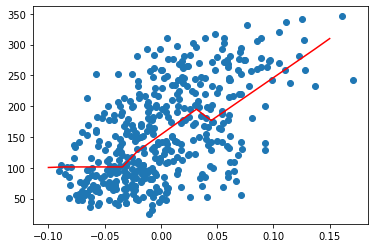

In [ ]:
norm = layers.Normalization(input_shape=[1,], axis=None)
norm.adapt(X_train)
model = keras.Sequential([
      norm,
      layers.Dense(units=64, activation='relu'),
      layers.Dense(units=64, activation='relu'),
      layers.Dense(units=1)
])
# model.summary()
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mse')
hist = model.fit(X_train, y_train, epochs=1000, verbose=0)

f, ax = plt.subplots()
ax.scatter(X, y)
ax.plot(np.linspace(-0.1, 0.15, 20), model.predict(np.linspace(-0.1, 0.15, 20)), c='red')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import google

pd_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',header=None,sep='\t', skipinitialspace=True)
data = []
for i in pd_data[0]:
    data.append(i.strip().split())
# print(data)
pd_data2 = pd.DataFrame(data).dropna()
print(pd_data2.isna().sum())
print(pd_data2)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64
        0  1      2      3      4     5   6  7
0    18.0  8  307.0  130.0  3504.  12.0  70  1
1    15.0  8  350.0  165.0  3693.  11.5  70  1
2    18.0  8  318.0  150.0  3436.  11.0  70  1
3    16.0  8  304.0  150.0  3433.  12.0  70  1
4    17.0  8  302.0  140.0  3449.  10.5  70  1
..    ... ..    ...    ...    ...   ...  .. ..
393  27.0  4  140.0  86.00  2790.  15.6  82  1
394  44.0  4  97.00  52.00  2130.  24.6  82  2
395  32.0  4  135.0  84.00  2295.  11.6  82  1
396  28.0  4  120.0  79.00  2625.  18.6  82  1
397  31.0  4  119.0  82.00  2720.  19.4  82  1

[398 rows x 8 columns]


In [2]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
pd_data = pd.read_csv(dataset_path, na_values = "?", comment='\t', sep=" ", skipinitialspace=True)

40960/30286 [========================================] - 0s 1us/step


In [3]:
pd_data = pd_data.dropna()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(pd_data.iloc[:, 0].astype('float64'), pd_data.iloc[:, 0].astype('float64'))
norm = layers.Normalization(input_shape=[1,], axis=None)
norm.adapt(X_train)
model = keras.Sequential([
    norm,
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(3)
])
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mse')
hist = model.fit(X_train, y_train, epochs=1000, verbose=0)


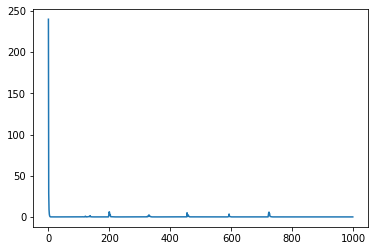

In [5]:
f, ax = plt.subplots()
ax.plot(hist.history['loss'])

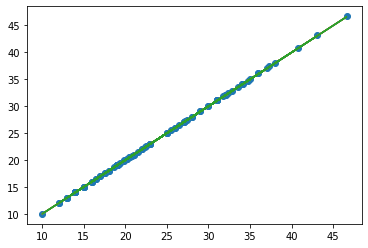

In [6]:
f, ax = plt.subplots()
ax.scatter(X_test, y_test)
ax.plot(X_test, model.predict(X_test))

In [14]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.7518


0.7517776489257812

In [7]:
X_train, X_test, y_train, y_test = train_test_split(pd_data.iloc[:, 3].astype('float64'), pd_data.iloc[:, 3].astype('float64'))
noprm = layers.Normalization(input_shape=[1,], axis=None)
norm.adapt(X_train)
model = keras.Sequential()
model.add(norm)
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3))
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mse')
hist2 = model.fit(X_train, y_train, epochs=1000, verbose=0)

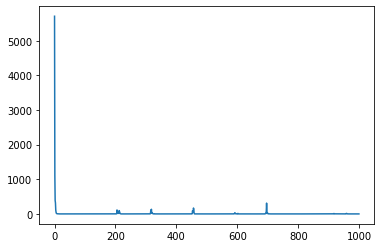

In [8]:
f, ax = plt.subplots()
ax.plot(hist2.history['loss'])

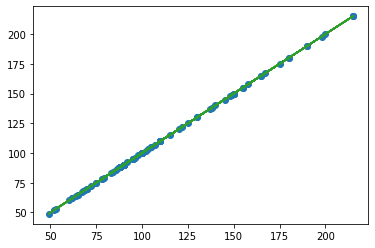

In [9]:
f, ax = plt.subplots()
ax.scatter(X_test, y_test)
ax.plot(X_test, model.predict(X_test))

In [12]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.0030


0.002963610691949725